# MODELING THE NYC DATASET

### Importing Libraries

In [1]:
#importing libraries 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
dat=pd.read_csv('nyc_taxi_trip_duration Dataset.csv')
dat.shape

(729322, 11)

## Cleaning the Dataset

In [3]:
dat.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
dat.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Typecasting the Variables

In [5]:
dat['vendor_id'] = dat['vendor_id'].astype('category')

In [6]:
dat['pickup_datetime'] = pd.to_datetime(dat.pickup_datetime)
dat['dropoff_datetime'] = pd.to_datetime(dat.dropoff_datetime)

In [7]:
dat['pickuphour']=dat.pickup_datetime.dt.hour
dat['pickupday']=dat.pickup_datetime.dt.dayofweek
dat['pickupmonth']=dat.pickup_datetime.dt.month
dat['dropoffhour']=dat.dropoff_datetime.dt.hour
dat['dropoffday']=dat.dropoff_datetime.dt.dayofweek
dat['dropoffmonth']=dat.dropoff_datetime.dt.month

In [8]:
#encoding store_and_fwd_flag
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dat['store_and_fwd_encoded'] = label_encoder.fit_transform(dat['store_and_fwd_flag'])

### trip_duration

#taking log of trip_duration for linearity
dat['trip_duration_log'] = np.log(dat['trip_duration'].values + 1)
sns.distplot(dat['trip_duration_log'], kde = False)
plt.show()

### Missing Values

In [9]:
dat.isnull().sum()

id                       0
vendor_id                0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
store_and_fwd_flag       0
trip_duration            0
pickuphour               0
pickupday                0
pickupmonth              0
dropoffhour              0
dropoffday               0
dropoffmonth             0
store_and_fwd_encoded    0
dtype: int64

### Removing Columns with less Significance

In [10]:
data=dat.drop(['pickup_datetime','dropoff_datetime','id','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag'], axis=1)

In [11]:
data=pd.get_dummies(data)

In [12]:
data.head()

,passenger_count,trip_duration,pickuphour,pickupday,pickupmonth,dropoffhour,dropoffday,dropoffmonth,store_and_fwd_encoded,vendor_id_1,vendor_id_2
0,1,400,16,0,2,16,0,2,0,0,1
1,2,1100,23,4,3,23,4,3,0,1,0
2,2,1635,17,6,2,18,6,2,0,0,1
3,6,1141,9,1,1,10,1,1,0,0,1
4,1,848,6,2,2,6,2,2,0,1,0


### Segregating variables: Independent and Dependent Variables

In [13]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 10), (729322,))

### Scaling the data (Using MinMax Scaler)

In [14]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [16]:
x.head()

,passenger_count,pickuphour,pickupday,pickupmonth,dropoffhour,dropoffday,dropoffmonth,store_and_fwd_encoded,vendor_id_1,vendor_id_2
0,0.111111,0.695652,0.000000,0.2,0.695652,0.000000,0.166667,0.0,0.0,1.0
1,0.222222,1.000000,0.666667,0.4,1.000000,0.666667,0.333333,0.0,1.0,0.0
2,0.222222,0.739130,1.000000,0.2,0.782609,1.000000,0.166667,0.0,0.0,1.0
3,0.666667,0.391304,0.166667,0.0,0.434783,0.166667,0.000000,0.0,0.0,1.0
4,0.111111,0.260870,0.333333,0.2,0.260870,0.333333,0.166667,0.0,1.0,0.0


## Implementing KNN Regressor

# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.

Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

RMSE is a better performance metric as it squares the errors before taking the averages. For that, large errors receive higher punishment. It performs particularly well when large errors are undesirable for your model's performance.

# Creating instance of KNN
reg = KNN(n_neighbors = 5)


# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
np.sqrt(mse(test_predict, test_y))
print('Test RMSE    ', k )

### Elbow for Classifier

def Elbow(K):
  #initiating empty list
    test_rmse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = np.sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
    
    return test_rmse

#Defining K range
k = range(1,10)

# calling above defined function
test = Elbow(k)

# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

# Creating instance of KNN
reg = KNN(n_neighbors = 9)
9
# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = np.sqrt(mse(test_predict, test_y))
print('Test RMSE    ', k )

### Implementing Linear Regression

In [17]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [18]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [19]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [20]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mse(train_predict, train_y)
print('Training Mean  Error', k )

Training Mean  Error 16646404.474059232


In [21]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('Test Mean  Error    ', k )

Test Mean  Error     9460622.572480237


### Parameters of Linear Regression

In [22]:
lr.coef_

array([   167.98630552,   -314.16797272,   1281.54283988, -71318.59676516,
          338.14768794,  -1312.53065701,  85694.87023335,    261.40622248,
         -102.26637575,    102.26637575])

### Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient plot')

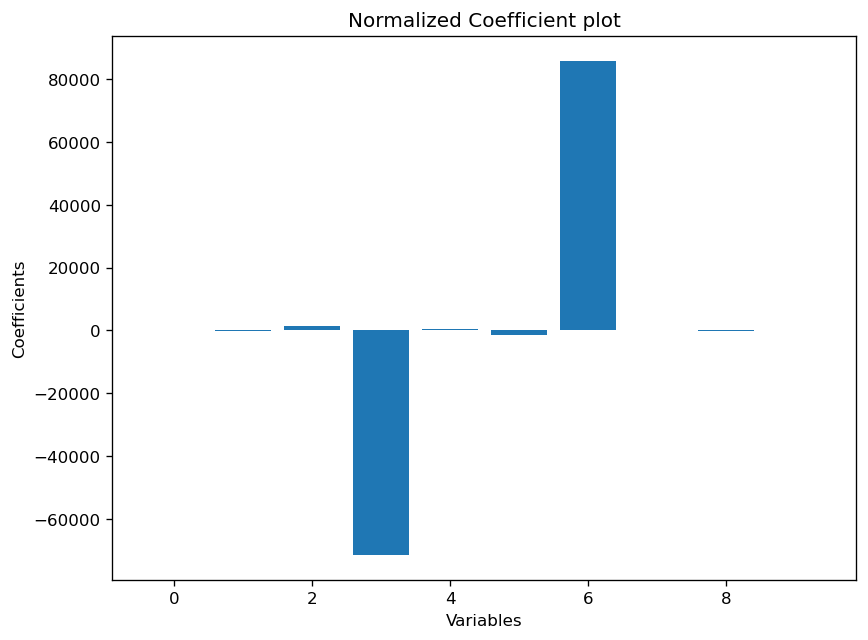

In [23]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

#### Creating new subsets of data

In [24]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 10), (729322,))

#### Arranging coefficients with features

In [25]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients

,Variable,coefficient
0,passenger_count,167.986306
1,pickuphour,-314.167973
2,pickupday,1281.542840
3,pickupmonth,-71318.596765
4,dropoffhour,338.147688
5,dropoffday,-1312.530657
6,dropoffmonth,85694.870233
7,store_and_fwd_encoded,261.406222
8,vendor_id_1,-102.266376
9,vendor_id_2,102.266376


#### Chossing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [26]:
sig_var = Coefficients[Coefficients.coefficient > 0]

#### Extracting the significant subset do independent Variables

In [27]:
subset = data[sig_var['Variable'].values]
subset.head()

,passenger_count,pickupday,dropoffhour,dropoffmonth,store_and_fwd_encoded,vendor_id_2
0,1,0,16,2,0,1
1,2,4,23,3,0,0
2,2,6,18,2,0,1
3,6,1,10,1,0,1
4,1,2,6,2,0,0


#### Splitting the data into train set and the test set

In [28]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

#### Implementing Linear Regression

In [29]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

#### Training Model

In [30]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

#### Predicting over the train set

In [31]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mse(train_predict, train_y)
print('Training Mean  Error', k )

Training Mean  Error 16714754.624462018


#### Predicting over the test set

In [32]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('Test Mean  Error    ', k )

Test Mean  Error     9540982.006291347


#### Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient plot')

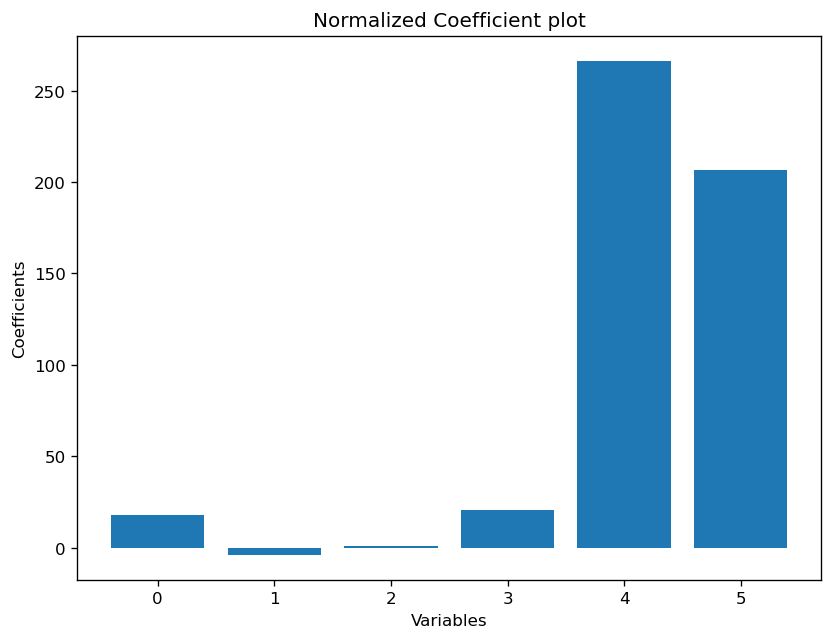

In [33]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

### Implementing Ridge Regression model

In [34]:
ridgem = Ridge(alpha = 2)

ridgem.fit(train_x, train_y)

ridgepredict=ridgem.predict(test_x)

# Evaluating the Ridge Regression model
print(r2_score(test_y, ridgepredict))

0.001493217877777453


### Implementing Lasso Regression

In [35]:
lassom = Lasso(alpha = 2)

lassom.fit(train_x, train_y)

lassopredict=lassom.predict(test_x)

# Evaluating the Lasso Regression model
print(r2_score(test_y, lassopredict))

0.0014554193573989016


## DECISION TREE Regression

In [36]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 10), (729322,))

In [37]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=10)
regressor.fit(train_x, train_y)

DecisionTreeRegressor(random_state=10)

In [39]:
y_pred = regressor.predict(test_x)

In [40]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
14908,2406,776.701754
87154,1457,757.861446
666581,163,1536.907767
543467,2160,645.509346
105193,402,1006.928934
...,...,...
186037,2248,1185.192308
348778,333,749.342007
37103,845,695.826291
400091,227,497.981481


In [41]:
regressor.score(train_x, train_y)

0.018712619055962

In [42]:
regressor.score(test_x, test_y)

-0.012382324336215111

In [43]:
from sklearn import tree

In [44]:
!pip install graphviz

In [49]:
decision_tree = tree.export_graphviz(regressor,out_file='nyctree.dot',feature_names=train_x.columns,max_depth=2,filled=True)

In [51]:
!dot -Tpng nyctree.dot -o nyctree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


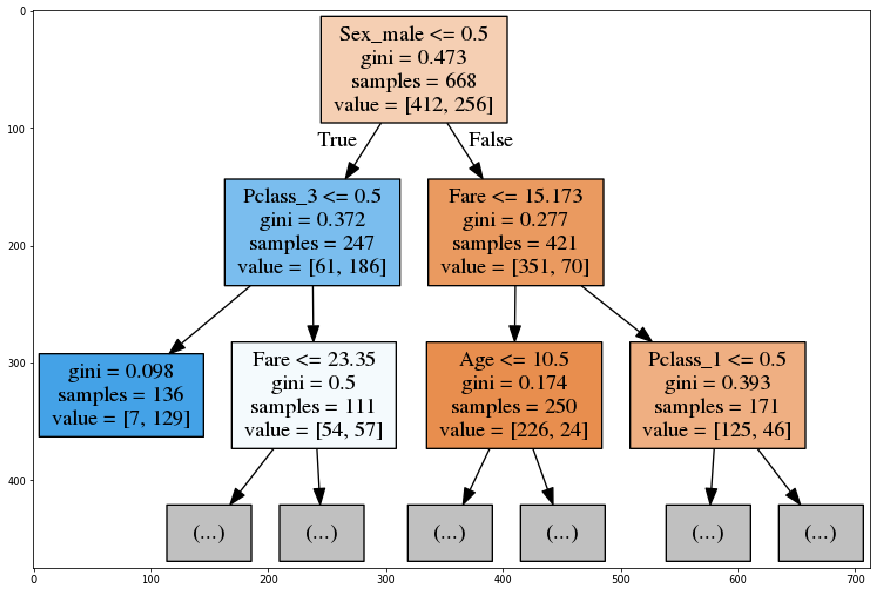

In [31]:
image = plt.imread('nyctree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)